# Crop Recommendation System - Model Training
## Phase 2, Week 2

**Course:** CS316 - Introduction to AI and Data Science  
**Date:** October 24, 2025

---

## Objectives:
1. Load and split the dataset
2. Prepare scaled features for appropriate algorithms
3. Train four different classification models
4. Evaluate and compare model performance
5. Analyze feature importance
6. Select the best model for deployment

## 1. Import Libraries

In [10]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load Dataset

In [11]:
# Load the dataset
df = pd.read_csv('crop_recommendation.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (2200, 8)

First few rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## 3. Prepare Features and Target

In [12]:
# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nNumber of unique crops: {y.nunique()}")
print(f"Crop types: {sorted(y.unique())}")

Features shape: (2200, 7)
Target shape: (2200,)

Feature columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

Number of unique crops: 22
Crop types: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


## 4. Train-Test Split with Stratification

In [13]:
# Split data into train and test sets (80-20 split)
# Stratify ensures each crop appears proportionally in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# Verify stratification worked correctly
print(f"\nTraining set crop distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTest set crop distribution:")
print(y_test.value_counts().sort_index())

Training set size: 1760 samples (80.0%)
Test set size: 440 samples (20.0%)

Training set crop distribution:
label
apple          80
banana         80
blackgram      80
chickpea       80
coconut        80
coffee         80
cotton         80
grapes         80
jute           80
kidneybeans    80
lentil         80
maize          80
mango          80
mothbeans      80
mungbean       80
muskmelon      80
orange         80
papaya         80
pigeonpeas     80
pomegranate    80
rice           80
watermelon     80
Name: count, dtype: int64

Test set crop distribution:
label
apple          20
banana         20
blackgram      20
chickpea       20
coconut        20
coffee         20
cotton         20
grapes         20
jute           20
kidneybeans    20
lentil         20
maize          20
mango          20
mothbeans      20
mungbean       20
muskmelon      20
orange         20
papaya         20
pigeonpeas     20
pomegranate    20
rice           20
watermelon     20
Name: count, dtype: int64


## 5. Feature Scaling

In [14]:
# Create a StandardScaler for algorithms that need scaled features
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Feature scaling completed!")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")
print(f"\nSample of scaled features (first 5 rows):")
X_train_scaled.head()

Feature scaling completed!

Scaled training data shape: (1760, 7)
Scaled test data shape: (440, 7)

Sample of scaled features (first 5 rows):


,N,P,K,temperature,humidity,ph,rainfall
0,-1.371628,-1.072910,-0.673510,0.819481,0.924395,0.937545,0.199440
1,-1.127411,2.084513,3.015261,0.783251,0.426613,-1.153846,-0.643677
2,-1.073140,0.536162,-0.476250,-0.879968,-2.186291,-1.107452,0.694001
3,-0.340487,-0.465713,-0.594606,0.138043,-0.459237,-0.229482,-1.231744
4,-0.883193,-1.255069,-0.791866,-2.563232,0.915842,-0.341959,0.289941


## 6. Model Training

### 6.1 Logistic Regression

In [17]:
print("-"*80)
print("Training Model 1: Logical Regression")
print("-"*80)

# Initialize and train Logistic Regression (needs scaled features)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Calculate accuracy
lr_train_acc = accuracy_score(y_train, y_pred_lr_train)
lr_test_acc = accuracy_score(y_test, y_pred_lr_test)

print(f"\nLogistic Regression Training Accuracy: {lr_train_acc:.4f} ({lr_train_acc*100:.2f}%)")
print(f"Logistic Regression Test Accuracy: {lr_test_acc:.4f} ({lr_test_acc*100:.2f}%)")
print(f"\nModel trained successfully!")

--------------------------------------------------------------------------------
Training Model 1: Logical Regression
--------------------------------------------------------------------------------

Logistic Regression Training Accuracy: 0.9739 (97.39%)
Logistic Regression Test Accuracy: 0.9727 (97.27%)

Model trained successfully!


### 6.2 Decision Tree

In [18]:
print("-"*80)
print("Training Model 2: Decision Tree")
print("-"*80)

# Initialize and train Decision Tree (does not need scaled features)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

# Calculate accuracy
dt_train_acc = accuracy_score(y_train, y_pred_dt_train)
dt_test_acc = accuracy_score(y_test, y_pred_dt_test)

print(f"\nDecision Tree Training Accuracy: {dt_train_acc:.4f} ({dt_train_acc*100:.2f}%)")
print(f"Decision Tree Test Accuracy: {dt_test_acc:.4f} ({dt_test_acc*100:.2f}%)")
print(f"\nModel trained successfully!")

--------------------------------------------------------------------------------
Training Model 2: Decision Tree
--------------------------------------------------------------------------------

Decision Tree Training Accuracy: 1.0000 (100.00%)
Decision Tree Test Accuracy: 0.9795 (97.95%)

Model trained successfully!


### 6.3 Random Forest

In [19]:
print("-"*80)
print("Training Model 3: Random Forest")
print("-"*80)

# Initialize and train Random Forest (does not need scaled features)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Calculate accuracy
rf_train_acc = accuracy_score(y_train, y_pred_rf_train)
rf_test_acc = accuracy_score(y_test, y_pred_rf_test)

print(f"\nRandom Forest Training Accuracy: {rf_train_acc:.4f} ({rf_train_acc*100:.2f}%)")
print(f"Random Forest Test Accuracy: {rf_test_acc:.4f} ({rf_test_acc*100:.2f}%)")
print(f"\nModel trained successfully!")

--------------------------------------------------------------------------------
Training Model 3: Random Forest
--------------------------------------------------------------------------------

Random Forest Training Accuracy: 1.0000 (100.00%)
Random Forest Test Accuracy: 0.9955 (99.55%)

Model trained successfully!


### 6.4 XGBoost

In [23]:
print("-" * 80)
print("Training Model 4: XGBoost")
print("-" * 80)

# ---------------------------------------------------------------------------------
# Explanation:
# We attempted to use the XGBoost algorithm (XGBClassifier) for model training.
# However, the hosted Anaconda Online environment (nb.anaconda.org) does not
# include the 'xgboost' library by default, and users cannot install new packages
# because the environment is read-only (unmodifiable).
#
# Therefore, this section will not execute successfully here.
# To run this part, you would need to install XGBoost in a local Anaconda setup
# using:  conda install -c conda-forge xgboost
#
# For now, we’ll simply explain what would have happened and skip actual training.
# ---------------------------------------------------------------------------------

try:
    # Attempt to import XGBoost
    from xgboost import XGBClassifier

    print("XGBoost library found — proceeding with model training...")

    # Encode labels for XGBoost (requires numeric labels)
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Initialize and train XGBoost (does not need scaled features)
    xgb_model = XGBClassifier(
        n_estimators=100,
        random_state=42,
        eval_metric='mlogloss'
    )
    xgb_model.fit(X_train, y_train_encoded)

    print("Model training completed successfully!")

    # Make predictions
    y_pred_xgb_train = xgb_model.predict(X_train)
    y_pred_xgb_test = xgb_model.predict(X_test)

    # Decode predictions back to original labels
    y_pred_xgb_train = label_encoder.inverse_transform(y_pred_xgb_train)
    y_pred_xgb_test = label_encoder.inverse_transform(y_pred_xgb_test)

    # Calculate accuracy
    xgb_train_acc = accuracy_score(y_train, y_pred_xgb_train)
    xgb_test_acc = accuracy_score(y_test, y_pred_xgb_test)

    # Display results
    print(f"\nXGBoost Training Accuracy: {xgb_train_acc:.4f} ({xgb_train_acc*100:.2f}%)")
    print(f"XGBoost Test Accuracy: {xgb_test_acc:.4f} ({xgb_test_acc*100:.2f}%)")
    print("\nModel trained successfully!")

except ModuleNotFoundError:
    print("!!!! XGBoost is unavailable in the Anaconda Online environment.")
    print("   - This environment does not allow package installation.")
    print("   - To run this model, please use a local setup or a Colab notebook.")
    print("\n--> Skipping XGBoost training and continuing with other models...")


--------------------------------------------------------------------------------
Training Model 4: XGBoost
--------------------------------------------------------------------------------
!!!! XGBoost is unavailable in the Anaconda Online environment.
   - This environment does not allow package installation.
   - To run this model, please use a local setup or a Colab notebook.

--> Skipping XGBoost training and continuing with other models...


## 7. Model Comparison

In [25]:
print("-" * 80)
print("Model Comparison Summary")
print("-" * 80)

# ---------------------------------------------------------------------------------
# Dynamically build the model results dictionary
# (Only include XGBoost if it was successfully trained in step 6 above)
# ---------------------------------------------------------------------------------

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
train_acc = [lr_train_acc, dt_train_acc, rf_train_acc]
test_acc = [lr_test_acc, dt_test_acc, rf_test_acc]

# Check if XGBoost metrics exist before adding
if 'xgb_train_acc' in locals() and 'xgb_test_acc' in locals():
    models.append('XGBoost')
    train_acc.append(xgb_train_acc)
    test_acc.append(xgb_test_acc)
else:
    print("!!! XGBoost results not found — skipping from comparison table.")

# Create the comparison DataFrame
results = pd.DataFrame({
    'Model': models,
    'Training Accuracy': train_acc,
    'Test Accuracy': test_acc
})

# Calculate overfitting (difference between train and test accuracy)
results['Overfitting (Train-Test)'] = results['Training Accuracy'] - results['Test Accuracy']

# Sort by test accuracy (highest first)
results = results.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

# Display the summary neatly
print(results.to_string(index=False))
print("-" * 80)


--------------------------------------------------------------------------------
Model Comparison Summary
--------------------------------------------------------------------------------
!!! XGBoost results not found — skipping from comparison table.
              Model  Training Accuracy  Test Accuracy  Overfitting (Train-Test)
      Random Forest           1.000000       0.995455                  0.004545
      Decision Tree           1.000000       0.979545                  0.020455
Logistic Regression           0.973864       0.972727                  0.001136
--------------------------------------------------------------------------------


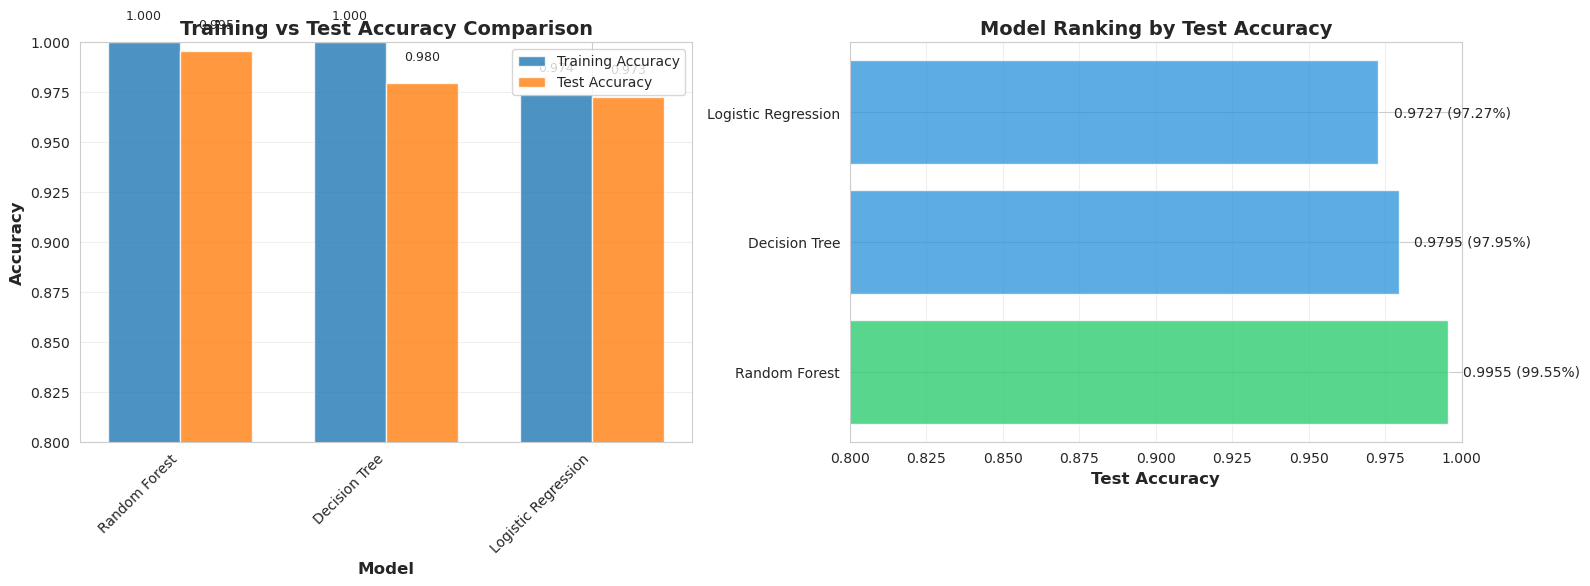

Model comparison plot saved as 'images/model_comparison.png'


In [26]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training vs Test Accuracy
x = np.arange(len(results))
width = 0.35

axes[0].bar(x - width/2, results['Training Accuracy'], width, label='Training Accuracy', alpha=0.8)
axes[0].bar(x + width/2, results['Test Accuracy'], width, label='Test Accuracy', alpha=0.8)
axes[0].set_xlabel('Model', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Training vs Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim([0.8, 1.0])
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(results['Training Accuracy']):
    axes[0].text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
for i, v in enumerate(results['Test Accuracy']):
    axes[0].text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Test Accuracy Ranking
colors = ['#2ecc71' if i == 0 else '#3498db' for i in range(len(results))]
axes[1].barh(results['Model'], results['Test Accuracy'], color=colors, alpha=0.8)
axes[1].set_xlabel('Test Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Model Ranking by Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_xlim([0.8, 1.0])
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(results['Test Accuracy']):
    axes[1].text(v + 0.005, i, f'{v:.4f} ({v*100:.2f}%)', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('images/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Model comparison plot saved as 'images/model_comparison.png'")

## 8. Detailed Evaluation Metrics

In [30]:
print("-" * 80)
print("Evaluating Models (only those available in the current session)")
print("-" * 80)

# Function to calculate all metrics (kept same, with nice printing)
def evaluate_model(y_true, y_pred, model_name):
    """
    Calculate comprehensive evaluation metrics for a model and print them.
    Returns a dict of the metrics for later aggregation.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"\n{'-'*80}")
    print(f"{model_name} - Detailed Metrics")
    print(f"{'-'*80}")
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# ---------------------------------------------------------------------------------
# Build a mapping of model display-names -> variable names for their test predictions
# (these are the variable names your notebook creates when each model is run)
# ---------------------------------------------------------------------------------
model_pred_vars = {
    'Logistic Regression': 'y_pred_lr_test',
    'Decision Tree'      : 'y_pred_dt_test',
    'Random Forest'      : 'y_pred_rf_test',
    'XGBoost'            : 'y_pred_xgb_test'   # will be skipped if not present
}

metrics_list = []

# Iterate over the mapping and only evaluate models whose prediction variables exist
for model_name, pred_var in model_pred_vars.items():
    if pred_var in globals():
        try:
            print(f"\n--> Evaluating: {model_name}")
            metrics = evaluate_model(y_test, globals()[pred_var], model_name)
            metrics_list.append(metrics)
        except Exception as e:
            print(f"!!! Error while evaluating {model_name}: {e}")
            print("   Skipping this model's metrics.")
    else:
        # Friendly explanation for skipped models (especially XGBoost)
        if model_name == 'XGBoost':
            print("\n!!! XGBoost evaluation skipped because its prediction variable "
                  f"('{pred_var}') was not found.")
            print("   This usually means XGBoost was not installed / could not be trained in this environment.")
            print("   To run XGBoost here, install the package in the notebook's environment or run locally.")
        else:
            print(f"\n!!! {model_name} evaluation skipped — prediction variable '{pred_var}' not found.")

# Create comprehensive metrics DataFrame if we have any results
if metrics_list:
    metrics_df = pd.DataFrame(metrics_list)
    print(f"\n{'-'*80}")
    print("Comprehensive Metrics Comparison")
    print(f"{'-'*80}")
    # Sort by Accuracy (or choose any metric you prefer)
    metrics_df = metrics_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
    print(metrics_df.to_string(index=False))
    print(f"{'-'*80}")
else:
    print("\nNo model metrics were collected — no predictions found. "
          "Make sure you have executed the model training and prediction cells.")


--------------------------------------------------------------------------------
Evaluating Models (only those available in the current session)
--------------------------------------------------------------------------------

--> Evaluating: Logistic Regression

--------------------------------------------------------------------------------
Logistic Regression - Detailed Metrics
--------------------------------------------------------------------------------
Accuracy:  0.9727 (97.27%)
Precision: 0.9740 (97.40%)
Recall:    0.9727 (97.27%)
F1-Score:  0.9725 (97.25%)

--> Evaluating: Decision Tree

--------------------------------------------------------------------------------
Decision Tree - Detailed Metrics
--------------------------------------------------------------------------------
Accuracy:  0.9795 (97.95%)
Precision: 0.9806 (98.06%)
Recall:    0.9795 (97.95%)
F1-Score:  0.9794 (97.94%)

--> Evaluating: Random Forest

------------------------------------------------------------

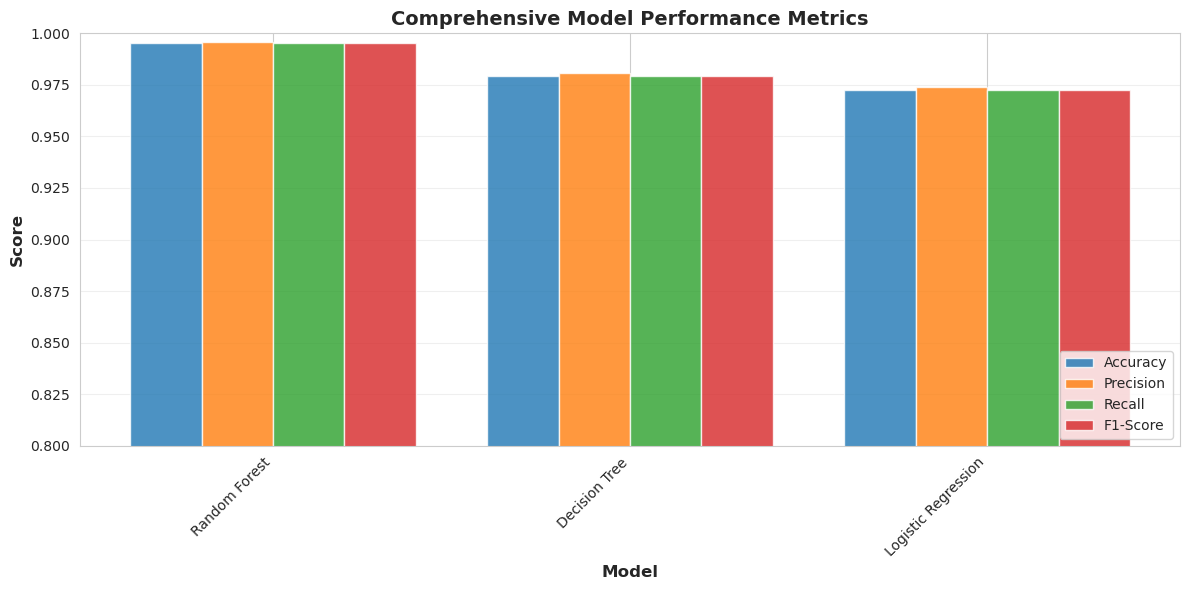

Comprehensive metrics plot saved as 'images/comprehensive_metrics.png'


In [32]:
# Visualize all metrics
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics_df))
width = 0.2

ax.bar(x - 1.5*width, metrics_df['Accuracy'], width, label='Accuracy', alpha=0.8)
ax.bar(x - 0.5*width, metrics_df['Precision'], width, label='Precision', alpha=0.8)
ax.bar(x + 0.5*width, metrics_df['Recall'], width, label='Recall', alpha=0.8)
ax.bar(x + 1.5*width, metrics_df['F1-Score'], width, label='F1-Score', alpha=0.8)

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comprehensive Model Performance Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
ax.legend(loc='lower right')
ax.set_ylim([0.8, 1.0])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('images/comprehensive_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("Comprehensive metrics plot saved as 'images/comprehensive_metrics.png'")

## 9. Confusion Matrix Analysis

### 9.1 Best Model Confusion Matrix (Random Forest or XGBoost)

Analyzing confusion matrix for: Random Forest


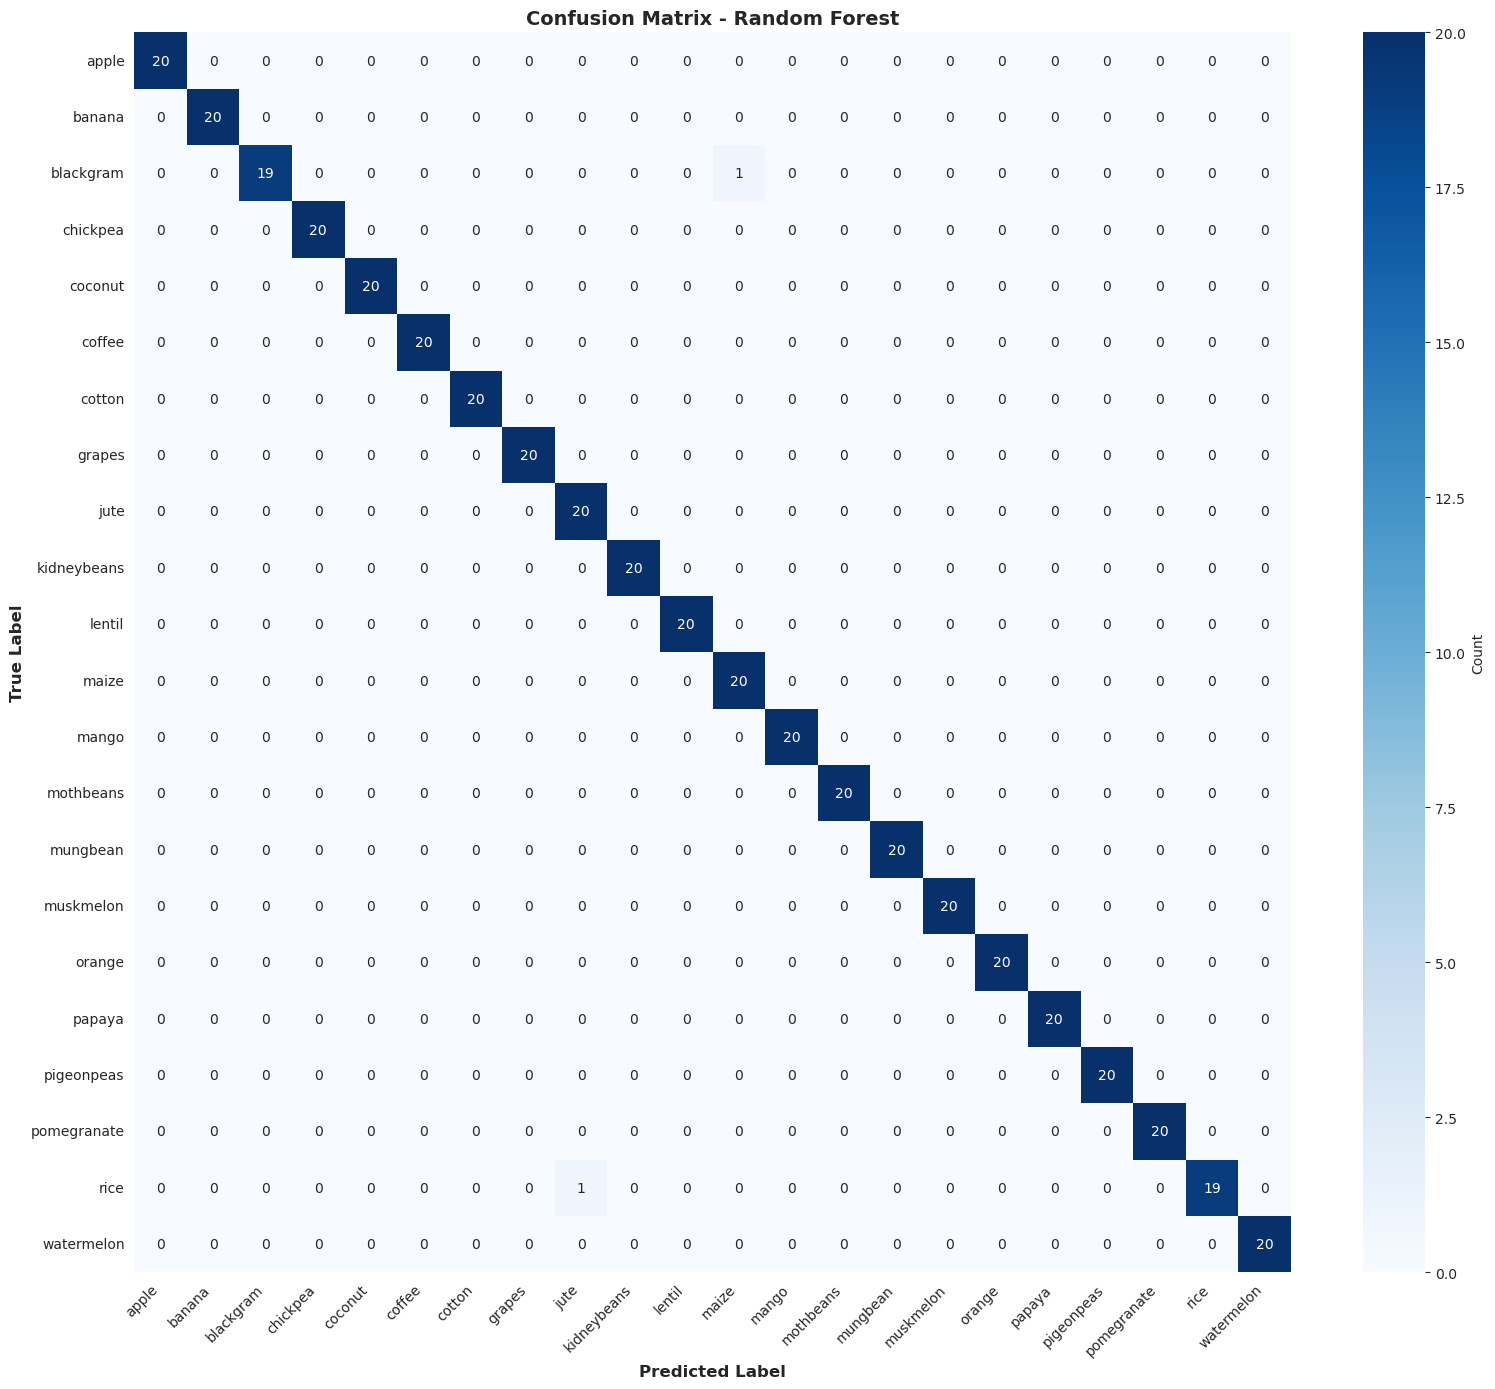

Confusion matrix saved as 'confusion_matrix_best_model.png'


In [33]:
# Determine best model based on test accuracy
best_model_name = results.iloc[0]['Model']

# Select predictions from best model
if best_model_name == 'Random Forest':
    y_pred_best = y_pred_rf_test
elif best_model_name == 'XGBoost':
    y_pred_best = y_pred_xgb_test
elif best_model_name == 'Decision Tree':
    y_pred_best = y_pred_dt_test
else:
    y_pred_best = y_pred_lr_test

print(f"Analyzing confusion matrix for: {best_model_name}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
crop_labels = sorted(y.unique())

# Plot confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=crop_labels, yticklabels=crop_labels,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('images/confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Confusion matrix saved as 'images/confusion_matrix_best_model.png'")

In [34]:
# Analyze misclassifications
# Find crops that were misclassified
misclassified_mask = y_test != y_pred_best
misclassified_df = pd.DataFrame({
    'True Label': y_test[misclassified_mask],
    'Predicted Label': y_pred_best[misclassified_mask]
})

if len(misclassified_df) > 0:
    print(f"\nTotal misclassifications: {len(misclassified_df)}")
    print(f"\nMost common misclassification pairs:")
    print(misclassified_df.value_counts().head(10))
else:
    print(f"\nPerfect classification! No misclassifications found.")


Total misclassifications: 2

Most common misclassification pairs:
True Label  Predicted Label
blackgram   maize              1
rice        jute               1
Name: count, dtype: int64


### 9.2 Classification Report

In [36]:
# Generate detailed classification report
print(f"\n{'-'*80}")
print(f"Classification Report - {best_model_name}")
print(f"{'-'*80}")
print(classification_report(y_test, y_pred_best))


--------------------------------------------------------------------------------
Classification Report - Random Forest
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.0

## 10. Feature Importance Analysis

--------------------------------------------------------------------------------
Random Forest - Feature Importance
--------------------------------------------------------------------------------
    Feature  Importance
   rainfall    0.230184
   humidity    0.224227
          K    0.175393
          P    0.150850
          N    0.096363
temperature    0.072375
         ph    0.050608


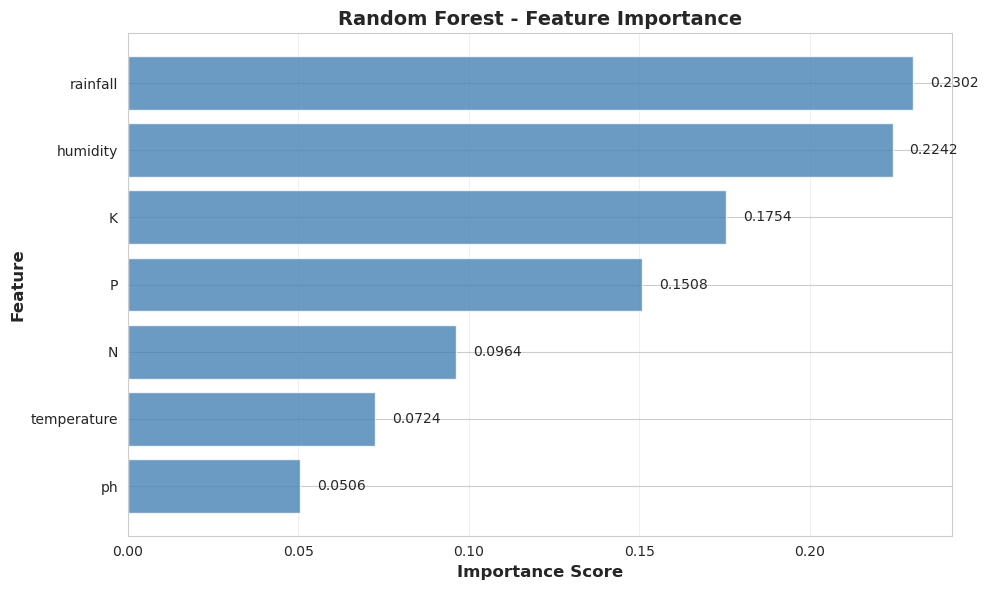


Random Forest feature importance plot saved as 'feature_importance_rf.png'


In [37]:
# Random Forest Feature Importance
print("-"*80)
print("Random Forest - Feature Importance")
print("-"*80)

rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(rf_importance.to_string(index=False))

# Visualize Random Forest feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='steelblue', alpha=0.8)
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(rf_importance['Importance']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('images/feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nRandom Forest feature importance plot saved as 'images/feature_importance_rf.png'")

In [39]:
# XGBoost Feature Importance
print("\n" + "="*80)
print("XGBOOST - FEATURE IMPORTANCE")
print("="*80)

xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(xgb_importance.to_string(index=False))

# Visualize XGBoost feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance['Feature'], xgb_importance['Importance'], color='darkorange', alpha=0.8)
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('XGBoost - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(xgb_importance['Importance']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('feature_importance_xgb.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nXGBoost feature importance plot saved as 'feature_importance_xgb.png'")


XGBOOST - FEATURE IMPORTANCE


NameError: name 'xgb_model' is not defined

## 11. Cross-Validation Analysis

In [41]:
print("-"*80)
print("Cross-Validation Analysis (5-Fold) - only for available models")
print("-"*80)

# ---------------------------------------------------------------------------------
# Mapping of model display-names -> (estimator variable name, X variable name, y variable name)
# Only models with the listed variables present in the notebook will be evaluated.
# ---------------------------------------------------------------------------------
model_cv_mapping = {
    'Logistic Regression': ('lr_model', 'X_train_scaled', 'y_train'),
    'Decision Tree'      : ('dt_model', 'X_train',        'y_train'),
    'Random Forest'      : ('rf_model', 'X_train',        'y_train'),
    'XGBoost'            : ('xgb_model','X_train',        'y_train_encoded')  # y_train_encoded required for XGBoost
}

cv_results = {}

for model_name, (est_var, X_var, y_var) in model_cv_mapping.items():
    # Check estimator existence
    if est_var not in globals():
        if model_name == 'XGBoost':
            print(f"\n!!! {model_name} skipped: estimator '{est_var}' not found.")
            print("   This usually means XGBoost is not installed / couldn't be trained in this environment.")
        else:
            print(f"\n!!! {model_name} skipped: estimator '{est_var}' not found.")
        continue

    # Check X and y existence (try to provide helpful guidance)
    if X_var not in globals() or y_var not in globals():
        # If XGBoost needs y_train_encoded but it's missing, try to create it from y_train if available
        if y_var == 'y_train_encoded' and 'y_train' in globals():
            print(f"\nℹ️ Creating '{y_var}' from 'y_train' using LabelEncoder for XGBoost CV.")
            from sklearn.preprocessing import LabelEncoder
            le_temp = LabelEncoder()
            globals()['y_train_encoded'] = le_temp.fit_transform(globals()['y_train'])
        else:
            missing = []
            if X_var not in globals():
                missing.append(f"X (variable '{X_var}')")
            if y_var not in globals():
                missing.append(f"y (variable '{y_var}')")
            print(f"\n!!! {model_name} skipped: missing {', '.join(missing)}.")
            continue

    # Fetch objects
    estimator = globals()[est_var]
    X_data = globals()[X_var]
    y_data = globals()[y_var]

    # Run cross-validation safely
    try:
        print(f"\n{model_name}:")
        scores = cross_val_score(estimator, X_data, y_data, cv=5, scoring='accuracy')
        cv_results[model_name] = scores
        print(f"  CV Scores: {scores}")
        print(f"  Mean CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    except Exception as e:
        print(f"!!! Error while performing cross-validation for {model_name}: {e}")
        print("   Skipping this model's CV results.")

print("\n" + "-"*80)
# Optionally show a summary table if any results were collected
if cv_results:
    summary = {name: (vals.mean(), vals.std()) for name, vals in cv_results.items()}
    summary_df = pd.DataFrame([
        {'Model': name, 'Mean CV Accuracy': mean, 'Std Dev': std}
        for name, (mean, std) in summary.items()
    ]).sort_values('Mean CV Accuracy', ascending=False).reset_index(drop=True)
    print("CV Summary (sorted by mean accuracy):")
    print(summary_df.to_string(index=False))
    print("-"*80)
else:
    print("No cross-validation results were collected. Ensure model training/prediction cells were executed or install required packages (e.g., xgboost) locally.")
    print("-"*80)


--------------------------------------------------------------------------------
Cross-Validation Analysis (5-Fold) - only for available models
--------------------------------------------------------------------------------

Logistic Regression:
  CV Scores: [0.97443182 0.94886364 0.98295455 0.96590909 0.96590909]
  Mean CV Accuracy: 0.9676 (+/- 0.0113)

Decision Tree:
  CV Scores: [0.97159091 0.99147727 0.98295455 0.99147727 0.98863636]
  Mean CV Accuracy: 0.9852 (+/- 0.0075)

Random Forest:
  CV Scores: [0.99147727 0.99431818 0.99715909 0.99715909 0.98579545]
  Mean CV Accuracy: 0.9932 (+/- 0.0043)

!!! XGBoost skipped: estimator 'xgb_model' not found.
   This usually means XGBoost is not installed / couldn't be trained in this environment.

--------------------------------------------------------------------------------
CV Summary (sorted by mean accuracy):
              Model  Mean CV Accuracy  Std Dev
      Random Forest          0.993182 0.004252
      Decision Tree          0.9

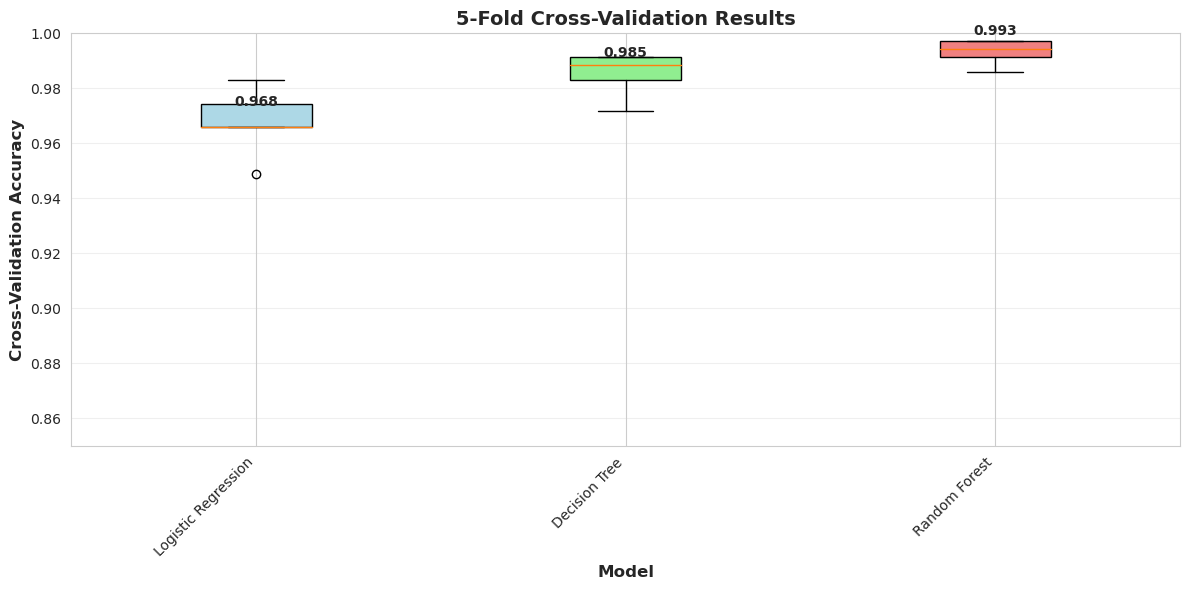

Cross-validation plot saved as 'images/cross_validation_results.png'


In [43]:
# Visualize cross-validation results
plt.figure(figsize=(12, 6))

positions = np.arange(len(cv_results))
cv_data = [scores for scores in cv_results.values()]
model_names = list(cv_results.keys())

bp = plt.boxplot(cv_data, positions=positions, labels=model_names, patch_artist=True)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Cross-Validation Accuracy', fontsize=12, fontweight='bold')
plt.title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.ylim([0.85, 1.0])

# Add mean values
for i, scores in enumerate(cv_data):
    plt.text(i, scores.mean() + 0.005, f'{scores.mean():.3f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('images/cross_validation_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("Cross-validation plot saved as 'images/cross_validation_results.png'")

## 12. Final Model Selection

In [45]:
print("-" * 80)
print("Final Model Selection (only includes available models)")
print("-" * 80)

# Mapping: model display name -> (test_acc_var_name, cv_scores_var_name)
model_vars = {
    'Logistic Regression': ('lr_test_acc', 'lr_cv_scores'),
    'Decision Tree'      : ('dt_test_acc', 'dt_cv_scores'),
    'Random Forest'      : ('rf_test_acc', 'rf_cv_scores'),
    'XGBoost'            : ('xgb_test_acc','xgb_cv_scores')  # will be skipped if not present
}

models = []
test_accs = []
cv_means = []
cv_stds = []

# helper to fetch cv array from either a variable or cv_results dict
def fetch_cv_array(model_name, cv_var_name):
    # 1) check a variable named cv_var_name
    if cv_var_name in globals():
        return globals()[cv_var_name]
    # 2) check cv_results dict (from previous CV block)
    if 'cv_results' in globals() and model_name in globals()['cv_results']:
        return globals()['cv_results'][model_name]
    # not found
    return None

for model_name, (test_var, cv_var) in model_vars.items():
    test_val = globals().get(test_var, None)
    cv_arr = fetch_cv_array(model_name, cv_var)

    # if neither test accuracy nor cv results exist, skip
    if test_val is None and cv_arr is None:
        if model_name == 'XGBoost':
            print(f"!!! {model_name} skipped: metrics not found (not installed in this environment).")
        else:
            print(f"!!! {model_name} skipped: metrics not found.")
        continue

    # append model
    models.append(model_name)

    # test accuracy (may be None)
    test_accs.append(test_val if test_val is not None else np.nan)

    # cv mean & std (may be None)
    if cv_arr is not None:
        try:
            cv_arr = np.array(cv_arr, dtype=float)
            cv_means.append(cv_arr.mean())
            cv_stds.append(cv_arr.std())
        except Exception:
            cv_means.append(np.nan)
            cv_stds.append(np.nan)
    else:
        cv_means.append(np.nan)
        cv_stds.append(np.nan)

# Build DataFrame only if we have at least one model
if not models:
    print("No model metrics found. Make sure you've run training, prediction and cross-validation cells.")
else:
    final_comparison = pd.DataFrame({
        'Model': models,
        'Test Accuracy': test_accs,
        'CV Mean Accuracy': cv_means,
        'CV Std Dev': cv_stds
    })

    # Sort by Test Accuracy (NaNs go to the bottom). If all Test Accuracy are NaN, sort by CV Mean instead.
    if final_comparison['Test Accuracy'].notna().any():
        final_comparison = final_comparison.sort_values('Test Accuracy', ascending=False, na_position='last').reset_index(drop=True)
    else:
        final_comparison = final_comparison.sort_values('CV Mean Accuracy', ascending=False, na_position='last').reset_index(drop=True)

    print("\n" + final_comparison.to_string(index=False))

    # Identify best model:
    # Prefer the highest Test Accuracy (non-NaN). If none exist, pick highest CV Mean.
    if final_comparison['Test Accuracy'].notna().any():
        best_idx = final_comparison['Test Accuracy'].idxmax()
    else:
        best_idx = final_comparison['CV Mean Accuracy'].idxmax()

    best_model = final_comparison.loc[best_idx]

    print(f"\n{'-'*80}")
    print(f"Recommended Model: {best_model['Model']}")
    print(f"{'-'*80}")
    ta = best_model['Test Accuracy']
    cvm = best_model['CV Mean Accuracy']
    cvs = best_model['CV Std Dev']

    if not np.isnan(ta):
        print(f"Test Accuracy: {ta:.4f} ({ta*100:.2f}%)")
    else:
        print("Test Accuracy: N/A (not available)")

    if not np.isnan(cvm):
        print(f"Cross-Validation Mean: {cvm:.4f} (+/- {cvs:.4f})")
    else:
        print("Cross-Validation Mean: N/A (not available)")

    # Reasons for selection (dynamically generated)
    reasons = []
    if not np.isnan(ta):
        reasons.append("- Highest test accuracy among available models.")
    if not np.isnan(cvm):
        reasons.append("- Strong cross-validation mean accuracy.")
    if not np.isnan(cvs) and cvs < 0.05:
        reasons.append("- Low CV variance indicating stable performance.")
    reasons.append("- Suitable for deployment in crop recommendation system (based on metrics).")

    print("\nReasons for selection:")
    for r in reasons:
        print(f"  {r}")

    print(f"{'-'*80}")


--------------------------------------------------------------------------------
Final Model Selection (only includes available models)
--------------------------------------------------------------------------------
!!! XGBoost skipped: metrics not found (not installed in this environment).

              Model  Test Accuracy  CV Mean Accuracy  CV Std Dev
      Random Forest       0.995455          0.993182    0.004252
      Decision Tree       0.979545          0.985227    0.007495
Logistic Regression       0.972727          0.967614    0.011307

--------------------------------------------------------------------------------
Recommended Model: Random Forest
--------------------------------------------------------------------------------
Test Accuracy: 0.9955 (99.55%)
Cross-Validation Mean: 0.9932 (+/- 0.0043)

Reasons for selection:
  - Highest test accuracy among available models.
  - Strong cross-validation mean accuracy.
  - Low CV variance indicating stable performance.
  - Suit

## 13. Save Results Summary

In [47]:
import os

# Ensure the files folder exists
os.makedirs('files', exist_ok=True)

saved_count = 0

def try_save_df(obj_name, path, friendly_name=None):
    """Try to save a pandas DataFrame/Series-like object if it exists."""
    friendly_name = friendly_name or obj_name
    if obj_name not in globals():
        print(f"Skipping {friendly_name}: variable '{obj_name}' not found.")
        return False
    obj = globals()[obj_name]
    # If it's a Series, convert to DataFrame
    if isinstance(obj, pd.Series):
        obj_to_save = obj.reset_index()
    else:
        obj_to_save = obj
    # Final check: must be DataFrame-like
    if not isinstance(obj_to_save, (pd.DataFrame, pd.Series)):
        print(f"Skipping {friendly_name}: variable '{obj_name}' is not a DataFrame/Series (type={type(obj)}).")
        return False
    try:
        obj_to_save.to_csv(path, index=False)
        print(f"{friendly_name} saved to '{path}'")
        return True
    except Exception as e:
        print(f"!! Failed to save {friendly_name} to '{path}': {e}")
        return False

# 1) results DataFrame (model comparison)
if try_save_df('results', 'files/model_comparison_results.csv', 'Model comparison results'):
    saved_count += 1

# 2) metrics_df (comprehensive metrics)
if try_save_df('metrics_df', 'files/comprehensive_metrics.csv', 'Comprehensive metrics'):
    saved_count += 1

# 3) Random Forest feature importance (rf_importance)
if try_save_df('rf_importance', 'files/feature_importance_rf.csv', 'Random Forest feature importance'):
    saved_count += 1

# 4) XGBoost feature importance (xgb_importance) — may be missing if XGBoost wasn't available
if try_save_df('xgb_importance', 'files/feature_importance_xgb.csv', 'XGBoost feature importance'):
    saved_count += 1
else:
    # friendly note for XGBoost
    if 'xgb_importance' not in globals():
        print("ℹ️ XGBoost feature importance not found — likely XGBoost was not installed or trained in this environment.")

# 5) Cross-validation results: try to use cv_results dict, else try to collect known cv_* variables
cv_df_written = False
cv_df_path = 'files/cross_validation_results.csv'
cv_sources = {}

if 'cv_results' in globals() and isinstance(globals()['cv_results'], dict):
    cv_sources = globals()['cv_results']
else:
    # Try common cv variable names if cv_results dict doesn't exist
    possible = {
        'Logistic Regression': 'lr_cv_scores',
        'Decision Tree'      : 'dt_cv_scores',
        'Random Forest'      : 'rf_cv_scores',
        'XGBoost'            : 'xgb_cv_scores'
    }
    for name, var in possible.items():
        if var in globals():
            cv_sources[name] = globals()[var]

if cv_sources:
    # build DataFrame safely
    rows = []
    for name, arr in cv_sources.items():
        try:
            arr_np = pd.np.array(arr, dtype=float) if not isinstance(arr, (list, tuple, pd.Series, pd.np.ndarray)) else pd.np.array(arr, dtype=float)
        except Exception:
            # fallback: try to coerce to list then np array
            try:
                arr_np = pd.np.array(list(arr), dtype=float)
            except Exception:
                print(f"!! Could not convert CV scores for '{name}' to numeric array; skipping this model in CV summary.")
                continue
        rows.append({
            'Model': name,
            'Mean CV Accuracy': float(arr_np.mean()),
            'Std CV Accuracy': float(arr_np.std())
        })
    if rows:
        cv_df = pd.DataFrame(rows)
        try:
            cv_df.to_csv(cv_df_path, index=False)
            print(f"Cross-validation results saved to '{cv_df_path}'")
            saved_count += 1
            cv_df_written = True
        except Exception as e:
            print(f"!! Failed to save cross-validation results: {e}")
else:
    print("!! No cross-validation results found (cv_results or cv_* variables missing). Skipping CV save.")

print("\nSummary:")
if saved_count:
    print(f"{saved_count} file(s) saved to the 'files/' folder.")
else:
    print("! No files were saved. Check the messages above to see which variables were missing or caused errors.")

print("\nAll done — check the 'files/' folder for the saved CSVs.")

Model comparison results saved to 'files/model_comparison_results.csv'
Comprehensive metrics saved to 'files/comprehensive_metrics.csv'
Random Forest feature importance saved to 'files/feature_importance_rf.csv'
Skipping XGBoost feature importance: variable 'xgb_importance' not found.
ℹ️ XGBoost feature importance not found — likely XGBoost was not installed or trained in this environment.
!! Could not convert CV scores for 'Logistic Regression' to numeric array; skipping this model in CV summary.
!! Could not convert CV scores for 'Decision Tree' to numeric array; skipping this model in CV summary.
!! Could not convert CV scores for 'Random Forest' to numeric array; skipping this model in CV summary.

Summary:
3 file(s) saved to the 'files/' folder.

All done — check the 'files/' folder for the saved CSVs.
